**Importing Files.**

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt


**Initialization**



In [ ]:
P=3; # period value to integrate continous value between [0,3]
BT=-6 # INTIAL TIME TO START THE SERIES
ET=6 # FINAL TIME
FS=1000 # NO OF DISCRETE VALUES TO BE GENERATED

Let t be an independent varaible.
f(t)=((tmodP)−(P/2))**3 , with period P=3

In [ ]:
f = lambda t: ((t % P) - (P / 2.)) ** 3

Discrete values of t between bt and ET


In [ ]:
t_range = np.linspace(BT, ET, FS)
y_true = f(t_range) #the true f(t)

function that computes the real fourier couples of coefficients (a0, 0), (a1, b1)...(aN, bN)

In [ ]:
def compute_real_fourier_coeffs(func, N):
    result = []
    for n in range(N+1):
        an = (2./P) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * n * t / P), 0, P)[0]
        bn = (2./P) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * n * t / P), 0, P)[0]
        result.append((an, bn))
    return np.array(result)

function that computes the real form Fourier series using an and bn coefficients

In [ ]:
def fit_func_by_fourier_series_with_real_coeffs(t, AB):
    result = 0.
    A = AB[:,0]
    B = AB[:,1]
    for n in range(0, len(AB)):
        if n > 0:
            result +=  A[n] * np.cos(2. * np.pi * n * t / P) + B[n] * np.sin(2. * np.pi * n * t / P)
        else:
            result +=  A[0]/2.
    return result

**Plotting graph**

In [28]:
def plot_graph():
  P=input("Enter Period for fourier Series:")
  maxN=8
  COLs = 2 #cols of plt
  ROWs = 1 + (maxN-1) // COLs #rows of plt
  plt.rcParams['font.size'] = 8
  fig, axs = plt.subplots(ROWs, COLs)
  fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)
  fig.suptitle('f(t) = ((t % P) - (P / 2.)) ** 3 where P=' + str(P))

  #plot, in the range from BT to ET, the true f(t) in blue and the approximation in red
  for N in range(1, maxN + 1):
      AB = compute_real_fourier_coeffs(f, N)
      #AB contains the list of couples of (an, bn) coefficients for n in 1..N interval.

      y_approx = fit_func_by_fourier_series_with_real_coeffs(t_range, AB)
      #y_approx contains the discrete values of approximation obtained by the Fourier series

      row = (N-1) // COLs
      col = (N-1) % COLs
      axs[row, col].set_title('case N=' + str(N))
      axs[row, col].scatter(t_range, y_true, color='blue', s=1, marker='.')
      axs[row, col].scatter(t_range, y_approx, color='red', s=2, marker='.')
  plt.show()

Enter Period for fourier Series:4


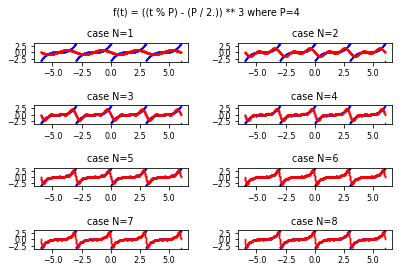

In [29]:
plot_graph();